{(0, 0): Text(0.0, 0.0, '(0, 0)'),
 (1, 0): Text(1.0, 0.0, '(1, 0)'),
 (2, 0): Text(2.0, 0.0, '(2, 0)'),
 (3, 0): Text(3.0, 0.0, '(3, 0)'),
 (4, 0): Text(4.0, 0.0, '(4, 0)'),
 (5, 0): Text(5.0, 0.0, '(5, 0)'),
 (0, 1): Text(0.5, 0.8660254037844386, '(0, 1)'),
 (1, 1): Text(1.5, 0.8660254037844386, '(1, 1)'),
 (2, 1): Text(2.5, 0.8660254037844386, '(2, 1)'),
 (3, 1): Text(3.5, 0.8660254037844386, '(3, 1)'),
 (4, 1): Text(4.5, 0.8660254037844386, '(4, 1)'),
 (5, 1): Text(5.5, 0.8660254037844386, '(5, 1)'),
 (0, 2): Text(0.0, 1.7320508075688772, '(0, 2)'),
 (1, 2): Text(1.0, 1.7320508075688772, '(1, 2)'),
 (2, 2): Text(2.0, 1.7320508075688772, '(2, 2)'),
 (3, 2): Text(3.0, 1.7320508075688772, '(3, 2)'),
 (4, 2): Text(4.0, 1.7320508075688772, '(4, 2)'),
 (5, 2): Text(5.0, 1.7320508075688772, '(5, 2)'),
 (0, 3): Text(0.5, 2.598076211353316, '(0, 3)'),
 (1, 3): Text(1.5, 2.598076211353316, '(1, 3)'),
 (2, 3): Text(2.5, 2.598076211353316, '(2, 3)'),
 (3, 3): Text(3.5, 2.598076211353316, '(3, 

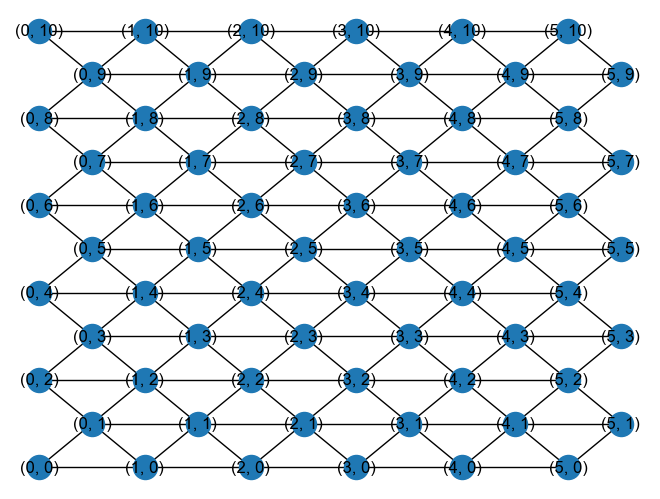

In [12]:
import networkx as nx
from networkx import triangular_lattice_graph

G = triangular_lattice_graph(10, 10)

pos = nx.get_node_attributes(G, "pos")
nx.draw(G, pos)
labels = {name : name for name in G.nodes()}
# print(G.nodes())
nx.draw_networkx_labels(G, pos, labels=labels)

In [16]:
import re
import math

notes = {name : "A" for name in G.nodes()}

TONNETZ = [3, 4, 7] # Horizontal, upright, upleft
STARTNOTE = 0
STARTOCT = 3

noteLookup = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
curr = STARTNOTE
currentRow = 0

lastStart = STARTNOTE

for coord in notes.keys():
    yCoord = coord[1]
    if yCoord > currentRow:
        currentRow = yCoord
        curr = lastStart
        if currentRow % 2 == 1: curr += TONNETZ[1] 
        else: curr += TONNETZ[2]
        lastStart = curr
            
    currOctave = STARTOCT + math.floor(curr / len(noteLookup))
    newNote = f"{noteLookup[curr % len(noteLookup)]} {currOctave}"
    notes[coord] = newNote
    curr -= TONNETZ[0] # Horizontal

print(notes)

{(0, 0): 'C 3', (1, 0): 'A 2', (2, 0): 'F# 2', (3, 0): 'D# 2', (4, 0): 'C 2', (5, 0): 'A 1', (0, 1): 'E 3', (1, 1): 'C# 3', (2, 1): 'A# 2', (3, 1): 'G 2', (4, 1): 'E 2', (5, 1): 'C# 2', (0, 2): 'B 3', (1, 2): 'G# 3', (2, 2): 'F 3', (3, 2): 'D 3', (4, 2): 'B 2', (5, 2): 'G# 2', (0, 3): 'D# 4', (1, 3): 'C 4', (2, 3): 'A 3', (3, 3): 'F# 3', (4, 3): 'D# 3', (5, 3): 'C 3', (0, 4): 'A# 4', (1, 4): 'G 4', (2, 4): 'E 4', (3, 4): 'C# 4', (4, 4): 'A# 3', (5, 4): 'G 3', (0, 5): 'D 5', (1, 5): 'B 4', (2, 5): 'G# 4', (3, 5): 'F 4', (4, 5): 'D 4', (5, 5): 'B 3', (0, 6): 'A 5', (1, 6): 'F# 5', (2, 6): 'D# 5', (3, 6): 'C 5', (4, 6): 'A 4', (5, 6): 'F# 4', (0, 7): 'C# 6', (1, 7): 'A# 5', (2, 7): 'G 5', (3, 7): 'E 5', (4, 7): 'C# 5', (5, 7): 'A# 4', (0, 8): 'G# 6', (1, 8): 'F 6', (2, 8): 'D 6', (3, 8): 'B 5', (4, 8): 'G# 5', (5, 8): 'F 5', (0, 9): 'C 7', (1, 9): 'A 6', (2, 9): 'F# 6', (3, 9): 'D# 6', (4, 9): 'C 6', (5, 9): 'A 5', (0, 10): 'G 7', (1, 10): 'E 7', (2, 10): 'C# 7', (3, 10): 'A# 6', (4, 10):

{(0, 0): Text(0.0, 0.0, 'C 3'),
 (1, 0): Text(1.0, 0.0, 'A 2'),
 (2, 0): Text(2.0, 0.0, 'F# 2'),
 (3, 0): Text(3.0, 0.0, 'D# 2'),
 (4, 0): Text(4.0, 0.0, 'C 2'),
 (5, 0): Text(5.0, 0.0, 'A 1'),
 (0, 1): Text(0.5, 0.8660254037844386, 'E 3'),
 (1, 1): Text(1.5, 0.8660254037844386, 'C# 3'),
 (2, 1): Text(2.5, 0.8660254037844386, 'A# 2'),
 (3, 1): Text(3.5, 0.8660254037844386, 'G 2'),
 (4, 1): Text(4.5, 0.8660254037844386, 'E 2'),
 (5, 1): Text(5.5, 0.8660254037844386, 'C# 2'),
 (0, 2): Text(0.0, 1.7320508075688772, 'B 3'),
 (1, 2): Text(1.0, 1.7320508075688772, 'G# 3'),
 (2, 2): Text(2.0, 1.7320508075688772, 'F 3'),
 (3, 2): Text(3.0, 1.7320508075688772, 'D 3'),
 (4, 2): Text(4.0, 1.7320508075688772, 'B 2'),
 (5, 2): Text(5.0, 1.7320508075688772, 'G# 2'),
 (0, 3): Text(0.5, 2.598076211353316, 'D# 4'),
 (1, 3): Text(1.5, 2.598076211353316, 'C 4'),
 (2, 3): Text(2.5, 2.598076211353316, 'A 3'),
 (3, 3): Text(3.5, 2.598076211353316, 'F# 3'),
 (4, 3): Text(4.5, 2.598076211353316, 'D# 3'),
 (5,

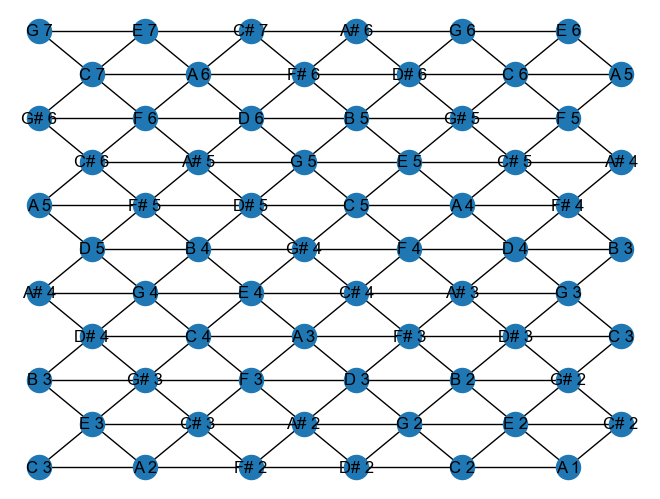

In [17]:
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, notes)

{(0, 0): Text(0.0, 0.0, 'C 3'),
 (1, 0): Text(0.8660254037844387, -0.49999999999999994, 'A 2'),
 (2, 0): Text(1.7320508075688774, -0.9999999999999999, 'F# 2'),
 (3, 0): Text(2.598076211353316, -1.4999999999999998, 'D# 2'),
 (4, 0): Text(3.464101615137755, -1.9999999999999998, 'C 2'),
 (5, 0): Text(4.330127018922194, -2.4999999999999996, 'A 1'),
 (0, 1): Text(0.8660254037844386, 0.5, 'E 3'),
 (1, 1): Text(1.7320508075688772, 1.1102230246251565e-16, 'C# 3'),
 (2, 1): Text(2.598076211353316, -0.4999999999999998, 'A# 2'),
 (3, 1): Text(3.464101615137755, -0.9999999999999998, 'G 2'),
 (4, 1): Text(4.330127018922194, -1.4999999999999996, 'E 2'),
 (5, 1): Text(5.196152422706633, -1.9999999999999996, 'C# 2'),
 (0, 2): Text(0.8660254037844385, 1.5, 'B 3'),
 (1, 2): Text(1.7320508075688772, 1.0, 'G# 3'),
 (2, 2): Text(2.598076211353316, 0.5000000000000001, 'F 3'),
 (3, 2): Text(3.4641016151377544, 2.220446049250313e-16, 'D 3'),
 (4, 2): Text(4.330127018922194, -0.4999999999999998, 'B 2'),
 (5, 2

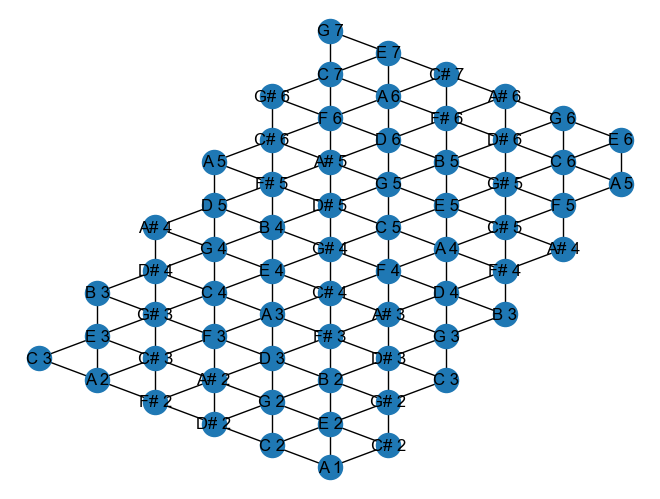

In [18]:
from math import cos, sin
rad = -30 * math.pi / 180
rotPos = {coord : (
    p[0] * cos(rad) - p[1] * sin(rad),
    p[1] * cos(rad) + p[0] * sin(rad)
) for coord, p in pos.items()}

nx.draw(G, rotPos)
nx.draw_networkx_labels(G, rotPos, notes)